In [ ]:
'''Helpful References:
Segmentation with Coins: http://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html
Watershed: http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html
Region-Prop: http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_regionprops.html
'''

In [104]:
import numpy as np
from skimage.morphology import skeletonize, medial_axis, watershed
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.feature import peak_local_max, canny
from scipy import ndimage
from skimage.filters import sobel
from skimage.measure import label, regionprops

Original Image


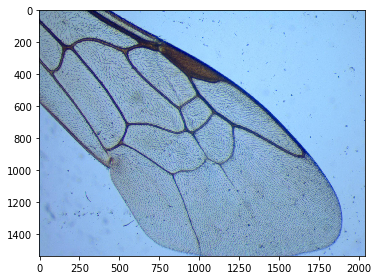

In [117]:
bee_image = imread("raw_image/2.jpg")
imshow(bee_image)
print("Original Image")

Black and White Image


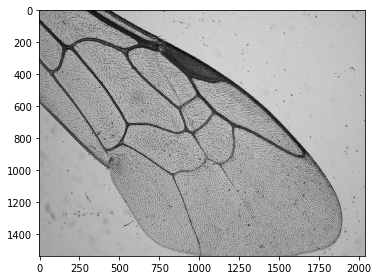

In [118]:
bnw = rgb2gray(bee_image)
imshow(bnw)
print("Black and White Image")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


Markers


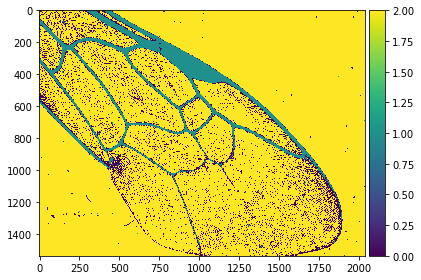

In [119]:
markers = np.zeros_like(bnw)
markers[bnw < 0.4] = 1
markers[bnw > 0.55] = 2
imshow(markers)
print("Markers")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


Segmented Image Using Watershed


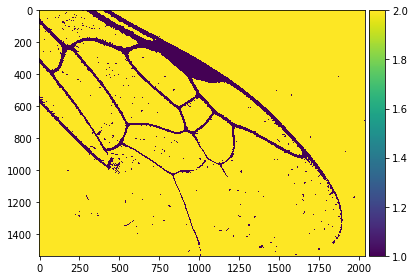

In [120]:
elevation_map = sobel(bnw)
segmentation = watershed(elevation_map, markers)
imshow(segmentation)
print("Segmented Image Using Watershed")

Watershed, Binary


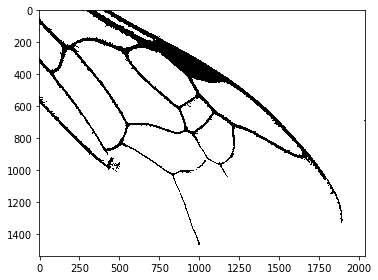

In [121]:
segmentation = ndi.binary_fill_holes(segmentation - 1)
imshow(segmentation)
print("Watershed, Binary")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


Labeled Regions


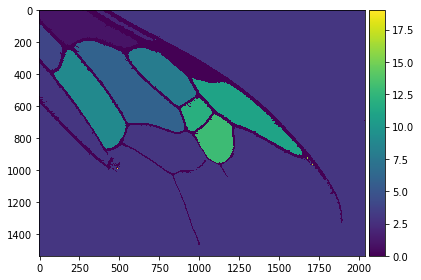

In [123]:
labeled_wing, _ = ndi.label(segmentation)
imshow(labeled_wing)
print("Labeled Regions")

In [124]:
regions = regionprops(labeled_wing)
print("Number of Regions: ", len(regions))
for props in regions:
    y0, x0 = props.centroid
    area = props.area
#     print(area)
#     print(y0, x0)

Number of Regions:  19


In [63]:
# distance = ndi.distance_transform_edt(bnw)
# local_maxi = peak_local_max(distance)
# markers = ndi.label(local_maxi)
# labels = watershed(-distance, markers, mask=bnw)

# imshow(-distance)

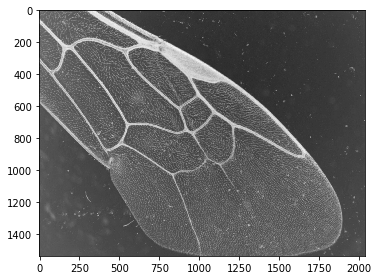

In [8]:
inverted_bee_image = invert(bnw)
imshow(inverted_bee_image)

In [114]:
# skeleton = medial_axis(bnw)
# fig, axes = plot.subplots(nrows=1, ncols=2, figsize=(8, 4),
#                          sharex=True, sharey=True)
# ax = axes.ravel()
# ax[0].imshow(skeleton, cmap=plot.cm.gray)
# imshow(skeleton)
# distance = ndimage.distance_transform_edt(bnw)
# local_maxi = peak_local_max(
#     distance, indices=False, footprint=np.ones((3, 3)), labels=bnw)
# markers = ndimage.label(local_maxi)[0]
# labels = watershed(-distance, markers, mask=image)

In [115]:
# distance = ndi.distance_transform_edt(bnw)